<a href="https://colab.research.google.com/github/laboratoriodecodigos/Colab-Python/blob/main/Naive_Bayes_MNIST_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CLASIFICADOR DE IMÁGENES CON NAIVE BAYES (MNIST - KAGGLE)

# Paso 1: Instalar y configurar Kaggle API
!pip install -q kaggle

# ---- IMPORTANTE ----
# Sube tu archivo kaggle.json (desde tu cuenta de Kaggle)
# Ve a https://www.kaggle.com/settings -> API -> Create New Token
from google.colab import files
files.upload()  # selecciona tu kaggle.json

# Crear carpeta y mover credenciales
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Paso 2: Descargar dataset MNIST (versión CSV)
!kaggle datasets download -d oddrationale/mnist-in-csv

# Descomprimir
!unzip -o mnist-in-csv.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
  0% 0.00/15.2M [00:00<?, ?B/s]
100% 15.2M/15.2M [00:00<00:00, 1.32GB/s]
Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [2]:
# Paso 3: Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Paso 4: Cargar dataset
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

print("Datos cargados correctamente")
print("Tamaño del conjunto de entrenamiento:", train.shape)
print("Tamaño del conjunto de prueba:", test.shape)


Datos cargados correctamente
Tamaño del conjunto de entrenamiento: (60000, 785)
Tamaño del conjunto de prueba: (10000, 785)


In [4]:
# Paso 5: Separar variables y escalar
X_train = train.drop("label", axis=1)
y_train = train["label"]

X_test = test.drop("label", axis=1)
y_test = test["label"]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Paso 6: Entrenar modelo Naive Bayes Gaussiano
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [6]:
# Paso 7: Predicciones
y_pred = model.predict(X_test_scaled)

In [10]:
# Paso 8: Reporte de clasificación
print("REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred))

REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.34      0.46      1010
           4       0.89      0.17      0.29       982
           5       0.54      0.05      0.09       892
           6       0.66      0.93      0.77       958
           7       0.88      0.27      0.41      1028
           8       0.28      0.68      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.55     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.55      0.52     10000



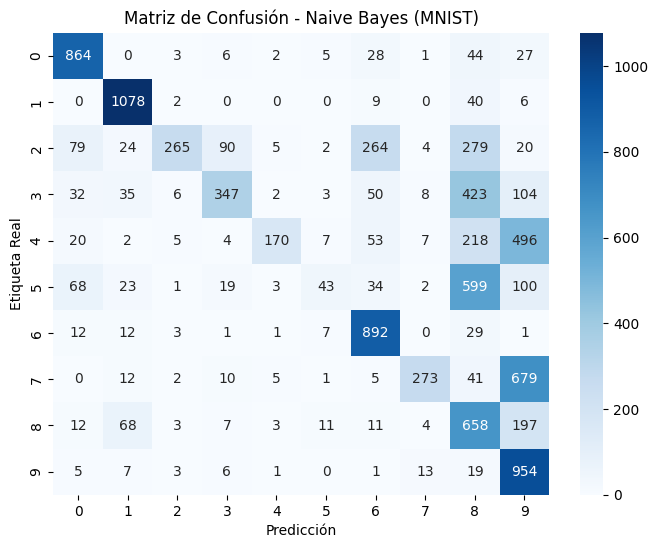

In [11]:
# Paso 9: Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes (MNIST)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.show()

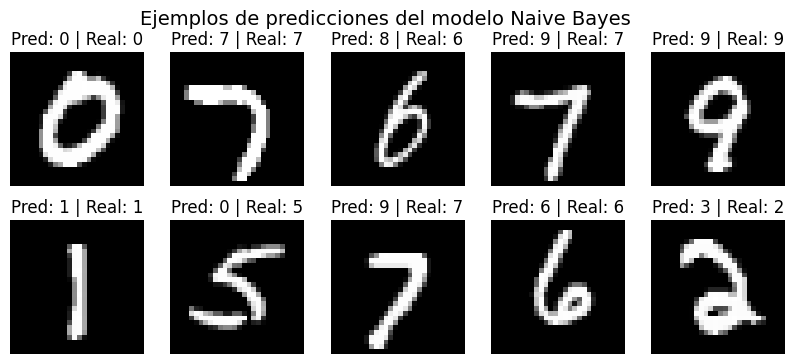

In [13]:
# Paso 10: Visualizar ejemplos
plt.figure(figsize=(10,4))
for i in range(10):
    idx = np.random.randint(0, len(X_test))
    image = X_test.iloc[idx].values.reshape(28, 28)
    plt.subplot(2,5,i+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Pred: {y_pred[idx]} | Real: {y_test.iloc[idx]}")
    plt.axis("off")
plt.suptitle("Ejemplos de predicciones del modelo Naive Bayes", fontsize=14)
plt.show()

In [16]:
# --- Paso 12: Preparar características e imágenes ---
X = train.iloc[:, 1:].values  # píxeles
y = train.iloc[:, 0].values

In [18]:
from skimage.feature import hog
from skimage import exposure


# --- Paso 13: Extraer características HOG ---
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img_reshaped = img.reshape((28, 28))
        features, _ = hog(img_reshaped, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

print("Extrayendo características HOG...")
X_hog = extract_hog_features(X)

Extrayendo características HOG...


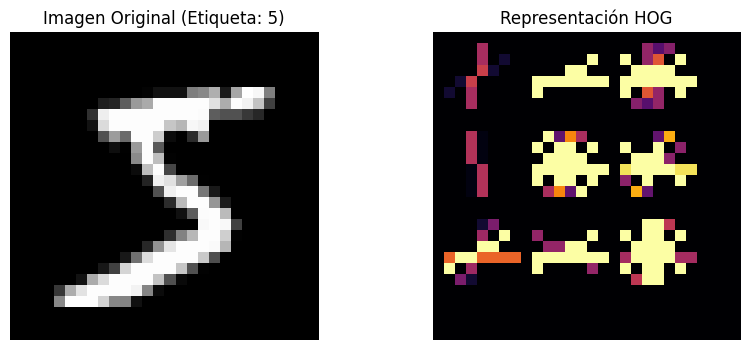

In [19]:
# Tomamos una muestra (por ejemplo, el primer número)
sample = train.iloc[0, 1:].values.reshape((28, 28))
label = train.iloc[0, 0]


# Calcular HOG y obtener la imagen de visualización ---
features, hog_image = hog(sample,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True)

# Ajustar el contraste para mejor visualización ---
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Mostrar resultados ---
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(sample, cmap='gray')
plt.title(f"Imagen Original (Etiqueta: {label})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='inferno')
plt.title("Representación HOG")
plt.axis('off')

plt.show()

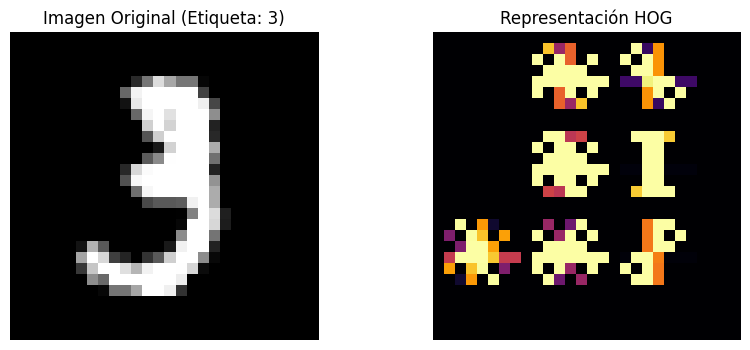

In [20]:
# Tomamos una muestra (por ejemplo, el primer número)
sample = train.iloc[10, 1:].values.reshape((28, 28))
label = train.iloc[10, 0]


# Calcular HOG y obtener la imagen de visualización ---
features, hog_image = hog(sample,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True)

# Ajustar el contraste para mejor visualización ---
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Mostrar resultados ---
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(sample, cmap='gray')
plt.title(f"Imagen Original (Etiqueta: {label})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='inferno')
plt.title("Representación HOG")
plt.axis('off')

plt.show()

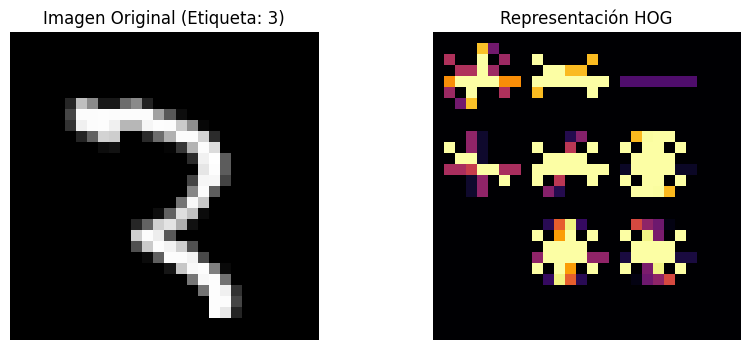

In [22]:
# Tomamos una muestra (por ejemplo, el primer número)
sample = train.iloc[500, 1:].values.reshape((28, 28))
label = train.iloc[500, 0]


# Calcular HOG y obtener la imagen de visualización ---
features, hog_image = hog(sample,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True)

# Ajustar el contraste para mejor visualización ---
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Mostrar resultados ---
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(sample, cmap='gray')
plt.title(f"Imagen Original (Etiqueta: {label})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='inferno')
plt.title("Representación HOG")
plt.axis('off')

plt.show()

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score

# --- Paso 14: Entrenar con validación cruzada ---
gnb = GaussianNB()
scores = cross_val_score(gnb, X_hog, y, cv=5)
print(f"Precisión media con validación cruzada: {scores.mean():.4f}")

Precisión media con validación cruzada: 0.8248



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1185
           1       0.90      0.95      0.92      1348
           2       0.87      0.84      0.86      1192
           3       0.84      0.79      0.82      1226
           4       0.87      0.76      0.81      1168
           5       0.88      0.84      0.86      1084
           6       0.83      0.91      0.87      1184
           7       0.92      0.65      0.76      1253
           8       0.71      0.79      0.75      1170
           9       0.68      0.89      0.77      1190

    accuracy                           0.83     12000
   macro avg       0.84      0.83      0.83     12000
weighted avg       0.84      0.83      0.83     12000



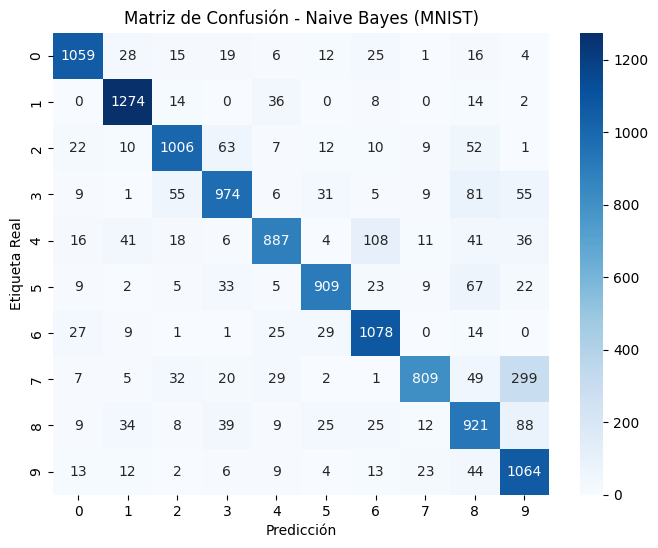

In [34]:
# --- Paso 15: Entrenamiento final y evaluación ---
indices = np.arange(len(X_hog))
train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42, stratify=y)

X_train = X_hog[train_indices]
X_test = X_hog[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]


X_original_test = X[test_indices]

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes (MNIST)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.show()

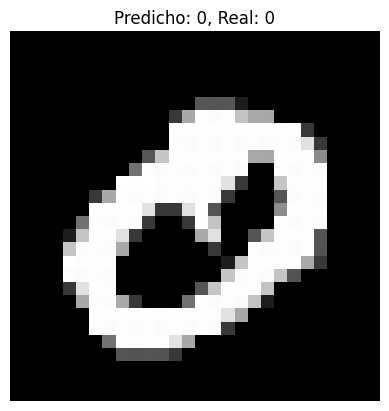

In [36]:
# --- Paso 16: Mostrar ejemplo visual ---
index = 10
# Use X_original_test to get the pixel data for visualization
plt.imshow(X_original_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicho: {y_pred[index]}, Real: {y_test[index]}")
plt.axis('off')
plt.show()